Tasks:

1. Sales Trends:

- Create a line chart to visualize monthly sales trends over the two years.
- Compare sales trends for 2010 and 2011 using a dual-axis plot or overlayed line charts.

2. Top Products:

- Use a bar chart to show the top 10 products by quantity sold.
- Create a pie chart to visualize the contribution of the top 5 products to total sales.

3. Customer Segmentation:

- Use a scatter plot to analyze the relationship between the number of purchases and total sales for each customer.
- Create a heatmap to show sales distribution across different months and days of the week.

4. Revenue by Category:

- If there are product categories, create a bar chart to show revenue by category.
- Use a stacked bar chart to compare category-wise sales across the two years.

5. Geographical Analysis:

- If the dataset contains geographical data (e.g., country or region), create a map or bar chart to visualize sales distribution by location.

6. Correlation Analysis:

- Use a heatmap to visualize correlations between numerical columns like Quantity, Price, and sales.

7. Quarterly Analysis:

- Create a grouped bar chart to compare quarterly sales for 2010 and 2011.
- Highlight the quarter with the highest sales for each year.

8. Anomaly Visualization:

- Use a line chart to highlight anomalies in sales trends (e.g., missing data in December 2011).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1= pd.read_excel("C:/Users/prash/Desktop/data/online_retail_II.xlsx", sheet_name='Year 2009-2010')
df2= pd.read_excel('C:/Users/prash/Desktop/data/online_retail_II.xlsx', sheet_name='Year 2010-2011')
df = pd.concat([df1, df2], ignore_index=True)

# Data Cleaning- negative values to positive values
df['Quantity'] = df['Quantity'].abs()
df['Price'] = df['Price'].abs()

# Adding revenue column
df['TotalPrice'] = df['Quantity'] * df['Price']

# Removing bad data(not related to online retail sales)- got this data after doing product analysis
scanlist=['Manual','AMAZON FEE','DOTCOM POSTAGE','Adjust bad debt', 'POSTAGE']
df = df[~df['Description'].isin(scanlist)]

# Ensure the date column is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year, month, quarter, week number, and day of the week
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Quarter'] = df['InvoiceDate'].dt.quarter
df['WeekNumber'] = df['InvoiceDate'].dt.isocalendar().week  # Week number
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()  # Day of the week as a string

# Drop duplicates
df.drop_duplicates(inplace=True) 

# Removing bad data with total price null and where prices can't be assigned
df=df[df['TotalPrice']!=0]

1. SALES TRENDS

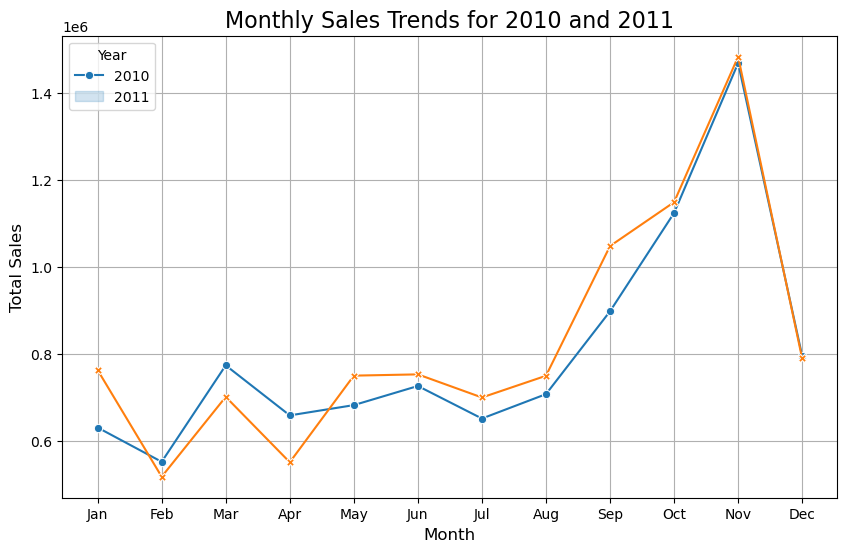

In [3]:
# Grouping data by Year and Month to calculate monthly sales
monthly_sales = df[df['Year'].isin([2010, 2011])].groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

# Pivoting the data for easier plotting
monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='TotalPrice')

# Plotting the overlayed line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales_pivot, markers=True, dashes=False)
plt.title('Monthly Sales Trends for 2010 and 2011', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', labels=['2010', '2011'])
plt.grid(True)
plt.show()

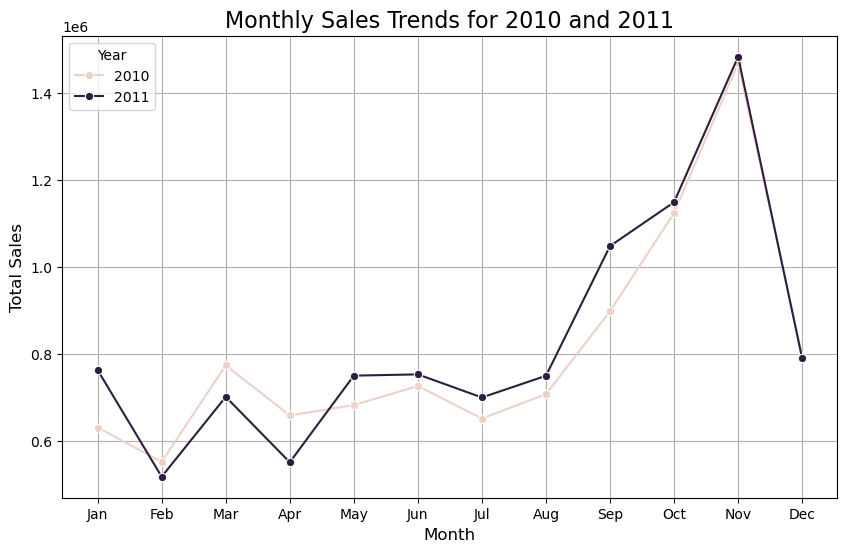

In [4]:
# Grouping data by Year and Month to calculate monthly sales
monthly_sales = df[df['Year'].isin([2010, 2011])].groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

# Plotting the overlayed line chart directly from the grouped data
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', hue='Year', marker='o')
plt.title('Monthly Sales Trends for 2010 and 2011', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

2. TOP PRODUCTS

In [5]:
topProdByQty=df.groupby('Description').agg({'Quantity':'sum'}).sort_values(by='Quantity', ascending=False).head(10).reset_index()

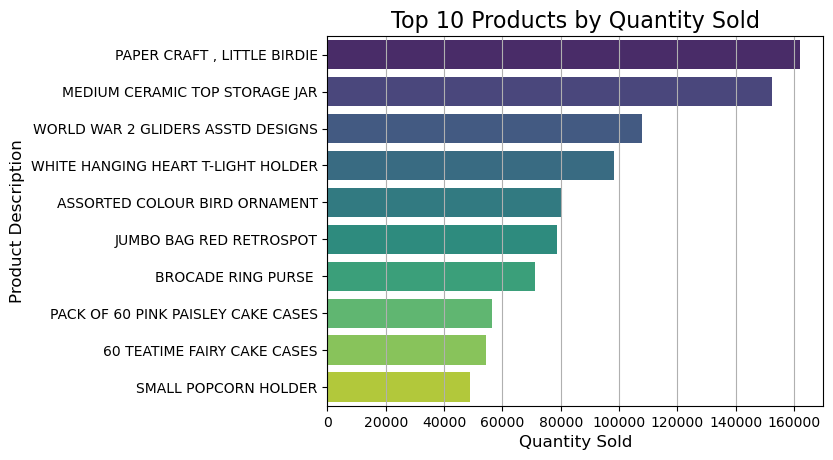

In [6]:
sns.barplot(data=topProdByQty, x='Quantity', y='Description', palette='viridis', hue='Description')
plt.title('Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.grid(axis='x')
plt.show()

In [7]:
top5prod=topProdByQty['Description'][0:5].tolist()
top5prod

['PAPER CRAFT , LITTLE BIRDIE',
 'MEDIUM CERAMIC TOP STORAGE JAR',
 'WORLD WAR 2 GLIDERS ASSTD DESIGNS',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'ASSORTED COLOUR BIRD ORNAMENT']

In [8]:
top5sales=df[df['Description'].isin(top5prod)].groupby('Description').agg({'TotalPrice':'sum'})

In [9]:
top5sales['revenuecontribution'] = top5sales['TotalPrice'] / sum(df['TotalPrice']) * 100
top5sales

,TotalPrice,revenuecontribution
Description,,
ASSORTED COLOUR BIRD ORNAMENT,130098.56,0.636110
MEDIUM CERAMIC TOP STORAGE JAR,159180.56,0.778305
"PAPER CRAFT , LITTLE BIRDIE",336939.20,1.647447
WHITE HANGING HEART T-LIGHT HOLDER,270377.32,1.321996
WORLD WAR 2 GLIDERS ASSTD DESIGNS,24807.29,0.121294


Revenue contribution of top 5 sold products by qty is miniscule in total sales

3. Customer Segmentation

In [10]:
scatter=df.groupby('Customer ID').agg({'Customer ID':'count','TotalPrice':'sum'}).sort_values(by='TotalPrice', ascending=False)
scatter.rename(columns={'Customer ID':'Frequency'}, inplace=True)
scatter.reset_index(inplace=True)
scatter

,Customer ID,Frequency,TotalPrice
0,18102.0,1047,584793.86
1,14646.0,3852,531681.37
2,16446.0,5,336951.10
3,14156.0,4105,310554.04
4,14911.0,11405,294351.19
...,...,...,...
5892,16580.0,2,5.00
5893,13788.0,1,3.75
5894,16738.0,1,3.75
5895,14095.0,1,2.95


<Axes: xlabel='Frequency', ylabel='TotalPrice'>

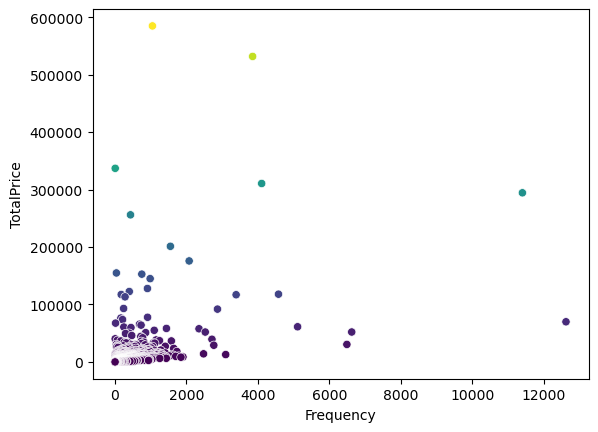

In [11]:
sns.scatterplot(data=scatter, x='Frequency', y='TotalPrice', palette='viridis', hue='TotalPrice',legend=False)

Let's add filter to the dataframe

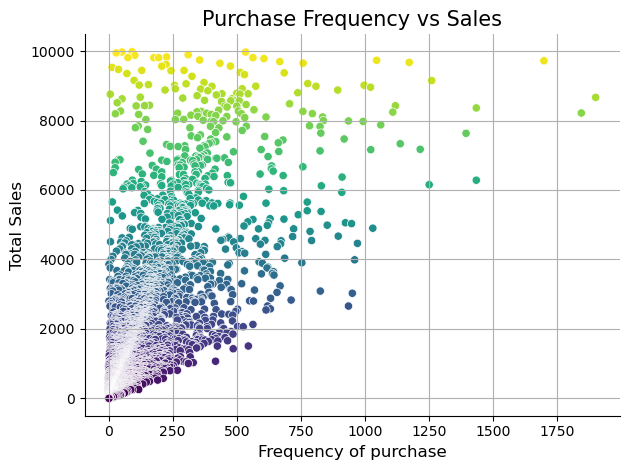

In [12]:
filtered=scatter[(scatter['Frequency']<=2000) & (scatter['TotalPrice']<=10000)]
sns.scatterplot(data=filtered, x='Frequency', y='TotalPrice', palette='viridis', hue='TotalPrice',legend=False)
plt.title('Purchase Frequency vs Sales', fontsize=15)
plt.xlabel('Frequency of purchase', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.tight_layout()
sns.despine()
plt.show()



From monthly sales trends, we see that there is a spike in sales in November. Let's use a heatmap to see on which days of november the sales are the highest

In [13]:
# Extracting the day from the 'InvoiceDate' column
df['Day'] = df['InvoiceDate'].dt.day

In [14]:
# Filter data for a specific month (e.g., November)
november_data = df[df['Month'] == 11]

# Group by week and day of the week, summing up sales
heatmap_data = november_data.groupby(['WeekNumber', 'DayOfWeek'])['TotalPrice'].sum().unstack()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the columns to include all days, filling missing values with 0
heatmap_data = heatmap_data.reindex(columns=day_order, fill_value=0)

#heatmap_data = heatmap_data[day_order]
heatmap_data

DayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
WeekNumber,,,,,,,
44,27991.200,77185.15,91455.690,153438.82,110900.01,0,73846.57
45,169709.911,127246.41,148079.930,136056.81,102815.02,0,62245.05
46,216939.630,130898.44,114912.631,103953.07,97914.71,0,65112.00
47,91964.610,125591.36,141812.820,123779.91,86777.25,0,47329.57
48,133387.050,132396.55,57146.080,NaN,NaN,0,NaN


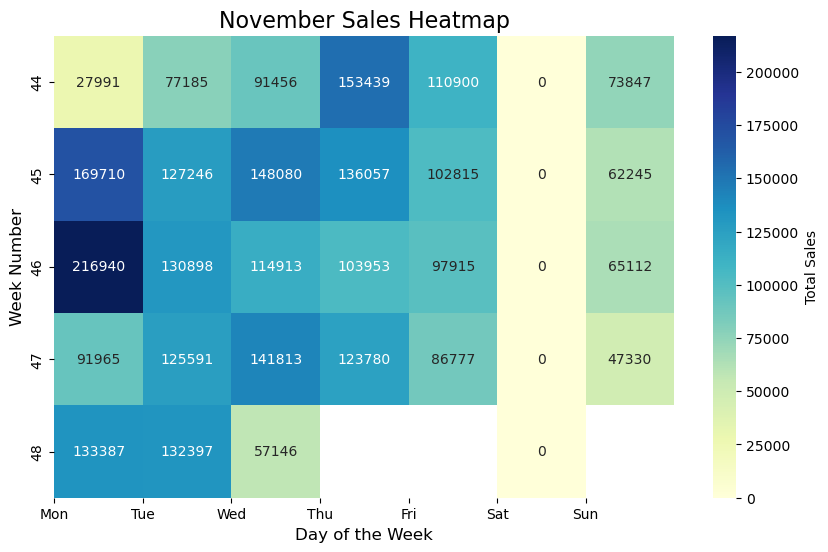

In [15]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Total Sales'})
plt.title('November Sales Heatmap', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Week Number', fontsize=12)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [16]:
country_sales=df.groupby('Country').agg({'TotalPrice':'sum'}).sort_values(by='TotalPrice', ascending=False).reset_index()
#country_sales

In [17]:
#pip install plotly

In [18]:
#pip install --upgrade nbformat

In [19]:
import nbformat
print(nbformat.__version__)

5.10.4


In [20]:
import plotly.express as px

# Rename columns for clarity
country_sales.rename(columns={'Country': 'country', 'TotalPrice': 'sales'}, inplace=True)

# Create a choropleth map using Plotly
fig = px.choropleth(
    country_sales,
    locations="country",  # Column with country names
    locationmode="country names",  # Match country names
    color="sales",  # Column to color by (sales)
    hover_name="country",  # Info to show on hover
    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale
    title="Country-wise Sales Visualization"
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="orthographic"  # Globe projection
    )
)

# Show the interactive visualization
fig.show()